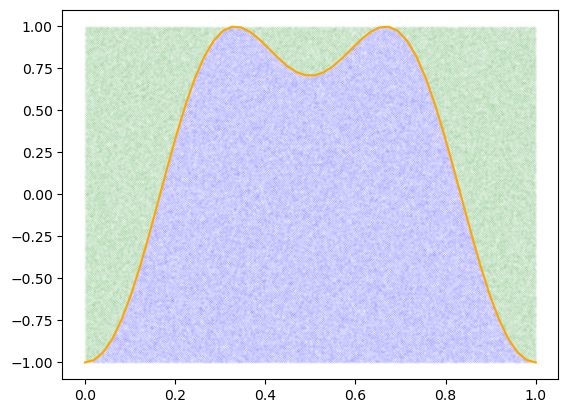

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

# generate true distribution

# start by generating Monte Carlo (e.g. von Neumann's technique) - this is our true distribution
def f(x):
    return -np.sin(x*1.5*math.pi+math.pi)**3 - np.cos(x*1.5*math.pi)**3  # underlying true p.d.f.

r = np.random.random(1000000)
sim = r
u = np.random.random(1000000)
y = -1.0 + u*2.0

neumann = sim[(y<f(sim))]
axisarray = y[(y<f(sim))]
rejected = sim[(y>=f(sim))]
rej_axis = y[(y>f(sim))]

x = np.linspace(0,1)


plt.plot(neumann, axisarray, '.', color='blue', markersize=0.01)
plt.plot(rejected, rej_axis, '.', color='green', markersize=0.01)
plt.plot(x, f(x), color='orange')

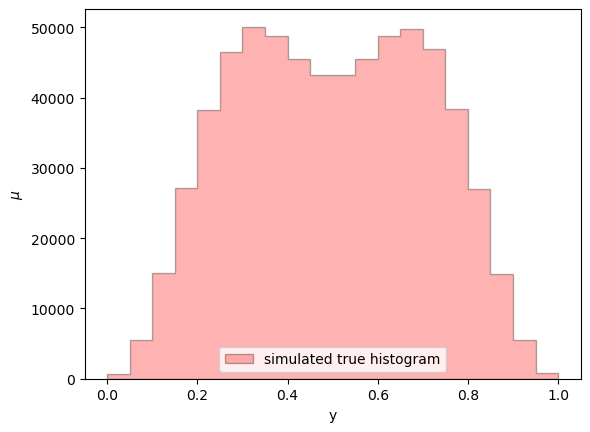

In [2]:
plt.hist(neumann, bins=20, color='red', edgecolor='black', histtype='stepfilled', alpha=0.3, range = (0,1), label='simulated true histogram') # true experiment values!
plt.xlabel('y')
plt.ylabel('$\\mu$')
plt.legend()
plt.savefig('True_distribution_histogram.pdf')

m = np.histogram(neumann, bins=20, range=(0,1)) # true histogram

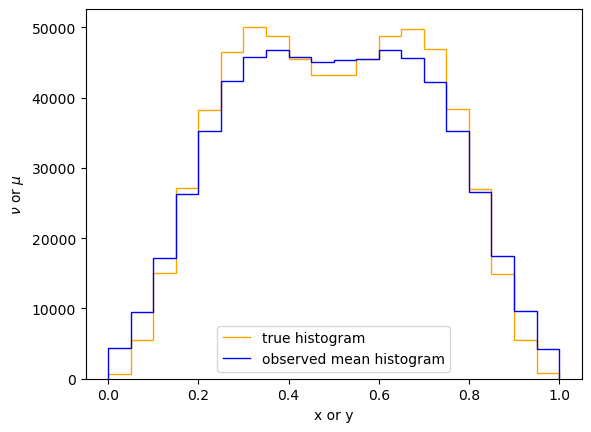

In [3]:
# computing expected values of observed values

# background is assumed to be 0 --> b_i=0
# efficiency is assumed to be 100% --> equal number of total events for "true" and "observed" histograms
# resolution: gaussian smearing with standard deviation = 1.5*bin width (bin width = 1/20 = 0.05)

#nu = np.random.normal(m[0],1.5*0.05,20)
#m_distorted = np.array([i + np.random.normal(0,200,1) for i in m[0]])
#nu = np.transpose(m_distorted)[0]
y_distorted = np.random.normal(neumann, 1.5*0.05, neumann.size)
nu = np.histogram(y_distorted, bins=20, range=(0,1))

plt.stairs(m[0], m[1], label='true histogram', color='orange')
plt.stairs(nu[0], m[1], label='observed mean histogram', color='blue')
plt.xlabel('x or y')
plt.ylabel('$\\nu$ or $\\mu$')
plt.legend()
plt.savefig('observed_mean_histogram.pdf')

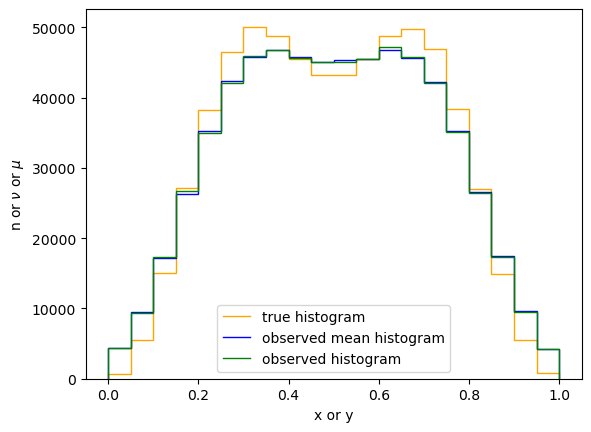

In [4]:
# computing actual observed values

n = np.random.poisson(nu[0])
#n_dist = np.random.poisson(y_distorted)
#n = np.histogram(n_dist, bins=20, range=(0,1))

plt.stairs(m[0], m[1], label='true histogram', color='orange')
plt.stairs(nu[0], m[1], label='observed mean histogram', color='blue')
plt.stairs(n, m[1], label='observed histogram', color='green')
plt.xlabel('x or y')
plt.ylabel('n or $\\nu$ or $\\mu$')
plt.legend()
plt.savefig('observed_histogram.pdf')

In [19]:
#m[1]
neumann
#y_distorted
counts_true = np.zeros((m[0].size, n.size))
counts_true.shape
m[0].size
n.size

20

In [6]:
# so far, we have implemented the resolution as a random distortion on the underlying function. Let's see what it corresponds to bin-wise - i.e. as a matrix:

counts_true = np.zeros((m[0].size, n.size))

for i in range(0,neumann.size):
    for k in range(0,m[0].size):
        for l in range(0,n.size):
            if neumann[i] > m[1][k] and neumann[i] <= m[1][k+1] and y_distorted[i] > nu[1][l] and y_distorted[i] <= nu[1][l+1]:
                counts_true[l][k] += 1/m[0][k]
                break
            else:
                continue



counts_true
        

array([[2.55291005e-01, 2.03339711e-01, 1.10081962e-01, 3.67997616e-02,
        9.38821830e-03, 1.15200000e-03, 2.20803726e-04, 2.05115583e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.12962963e-01, 2.53435380e-01, 1.95375491e-01, 1.04663290e-01,
        3.93582998e-02, 9.28000000e-03, 1.42518768e-03, 1.43580908e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.30952381e-01, 2.17777005e-01, 2.57813021e-01, 2.01616508e-01,
        1.11549572e-01, 3.97440000e-02, 9.81572925e-03, 1.88706336e-03,
        1.53559285e-04, 2.30234379e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.0000

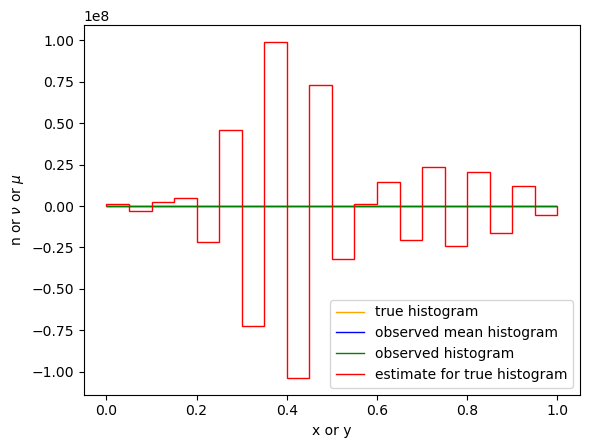

In [7]:
R = counts_true

Rinv = np.linalg.inv(R)

estim_mu = np.matmul(Rinv,n)
#unc_estim_mu = np.sqrt(estim_mu)
#axis = np.linspace(0,1,20)

plt.stairs(m[0], m[1], label='true histogram', color='orange')
plt.stairs(nu[0], m[1], label='observed mean histogram', color='blue')
plt.stairs(n, m[1], label='observed histogram', color='green')
plt.stairs(estim_mu, m[1], label='estimate for true histogram', color='red')
#plt.errorbar(axis, estim_mu, yerr=unc_estim_mu, color='black', fmt='.')
plt.xlabel('x or y')
plt.ylabel('n or $\\nu$ or $\\mu$')
plt.legend()
plt.savefig('estimated_true_histogram.pdf')

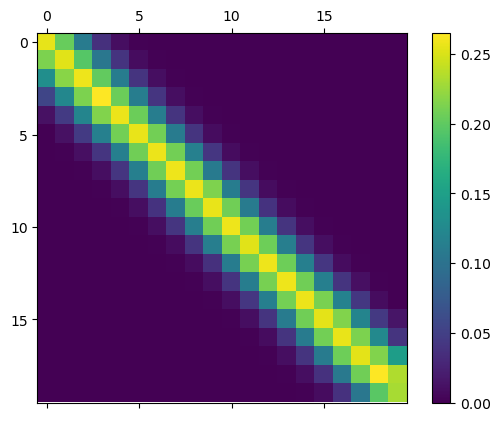

In [16]:
plt.matshow(R, fignum=0)
plt.colorbar()
plt.savefig('ResponseMatrix.pdf')

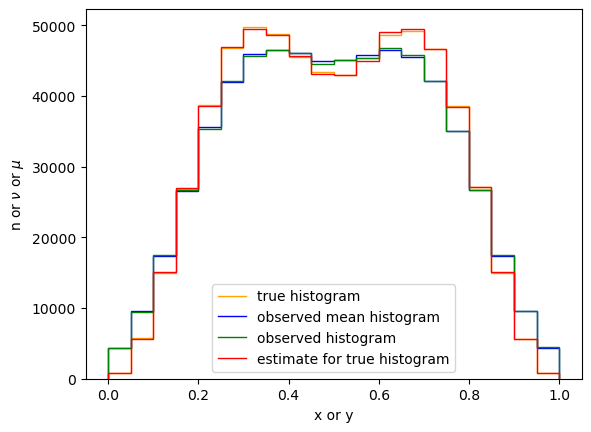

In [32]:
# correction factors

c = m[0]/nu[0]

mu_c = c*n


plt.stairs(m[0], m[1], label='true histogram', color='orange')
plt.stairs(nu[0], m[1], label='observed mean histogram', color='blue')
plt.stairs(n, m[1], label='observed histogram', color='green')
plt.stairs(mu_c, m[1], label='estimate for true histogram', color='red')
#plt.errorbar(axis, estim_mu, yerr=unc_estim_mu, color='black', fmt='.')
plt.xlabel('x or y')
plt.ylabel('n or $\\nu$ or $\\mu$')
plt.legend()
plt.savefig('corr_method_estimated_true_histogram.pdf')

In [11]:
# try different p.d.f. hypothesis and see whether it is biased or not

def g(x):
    return -np.sin(x*1.5*math.pi+math.pi)**2 - np.cos(x*1.5*math.pi)**3  # underlying true p.d.f.

#x = np.linspace(0,1,20)
#plt.plot(x, g(x))

def Neumann_MC(func):
    r = np.random.random(1000000)
    sim = r
    u = np.random.random(1000000)
    y = -1.0 + u*2.0
    neumann = sim[(y<func(sim))]
    axisarray = y[(y<func(sim))]
    rejected = sim[(y>=func(sim))]
    rej_axis = y[(y>func(sim))]
    return neumann

Y_model = Neumann_MC(g)



[0.65901067 0.78124962 0.76747548 ... 0.58787545 0.77147687 0.71646373]


array([0.65901067, 0.78124962, 0.76747548, ..., 0.58787545, 0.77147687,
       0.71646373])

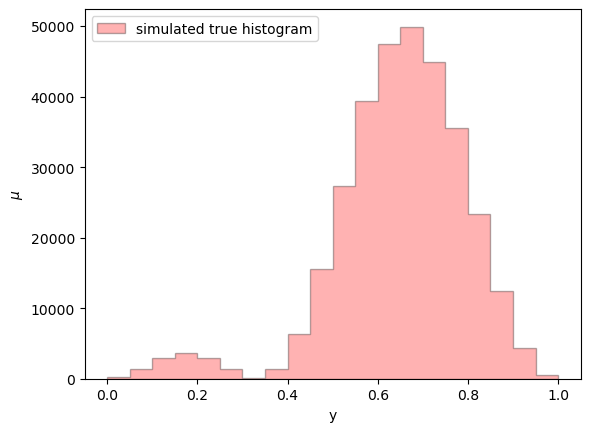

In [12]:
plt.hist(Y_model, bins=20, color='red', edgecolor='black', histtype='stepfilled', alpha=0.3, range = (0,1), label='simulated true histogram') # true experiment values!
plt.xlabel('y')
plt.ylabel('$\\mu$')
plt.legend()
plt.savefig('True_Model_distribution_histogram_corrfactors.pdf')

M = np.histogram(Y_model, bins=20, range=(0,1)) # true histogram

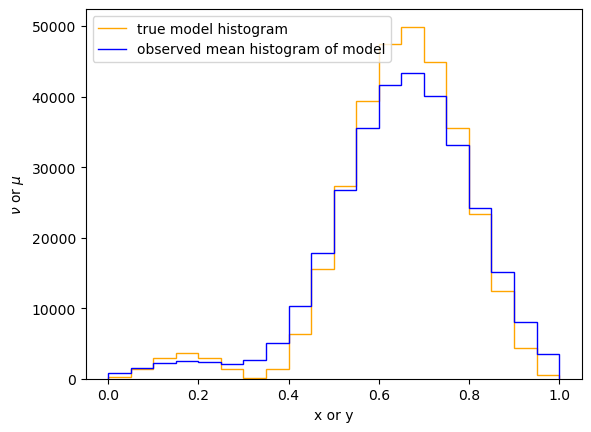

In [13]:
Y_distorted = np.random.normal(Y_model, 1.5*0.05, Y_model.size)
NU = np.histogram(Y_distorted, bins=20, range=(0,1))

plt.stairs(M[0], M[1], label='true model histogram', color='orange')
plt.stairs(NU[0], M[1], label='observed mean histogram of model', color='blue')
plt.xlabel('x or y')
plt.ylabel('$\\nu$ or $\\mu$')
plt.legend()
plt.savefig('model_observed_mean_histogram_corrfactors.pdf')

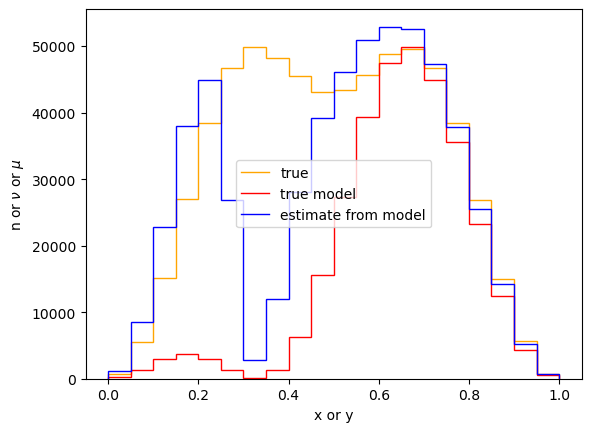

In [25]:
# correction factors

C = M[0]/NU[0]

MU_C = C*n


plt.stairs(m[0], m[1], label='true', color='orange')
plt.stairs(M[0], M[1], label='true model', color='red')
#plt.stairs(nu[0], m[1], label='observed mean histogram', color='blue')
#plt.stairs(n, m[1], label='observed histogram', color='green')
plt.stairs(MU_C, M[1], label='estimate from model', color='blue')
#plt.errorbar(axis, estim_mu, yerr=unc_estim_mu, color='black', fmt='.')
plt.xlabel('x or y')
plt.ylabel('n or $\\nu$ or $\\mu$')
plt.legend()
plt.savefig('corr_method_estimated_true_histogram_diffmodel.pdf')